# Unsupervised Learning

Objective: To explore unsupervised learning algorithms to cluster similar data.

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from collections import defaultdict
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import time

In [31]:
# Dataset 1
dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Dataset 2
df = pd.read_csv(
    "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
)
df.head()

initial_centers = np.array([dataset_1[1], dataset_1[2], dataset_1[7]])

df_test = df[:300]
df_actual = df[300:]

In [32]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


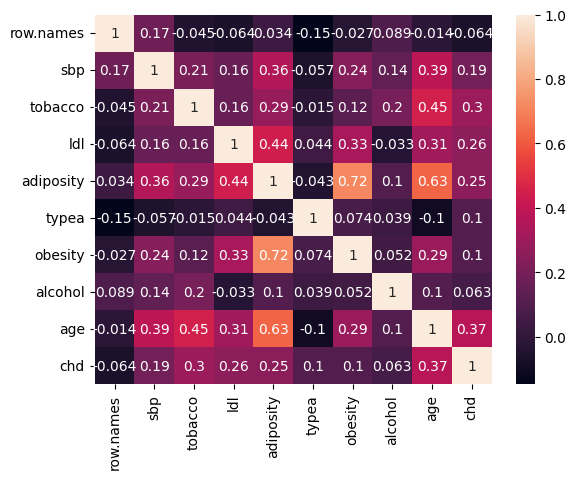

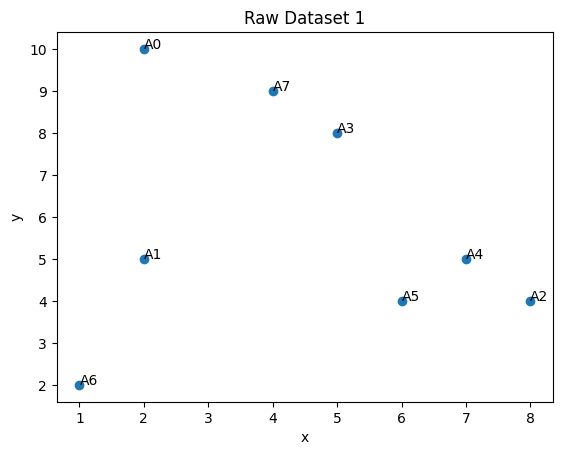

In [33]:
# EDA of dataset_2
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

# Plotting original dataset 2
x = [x[0] for x in dataset_1]
y = [y[1] for y in dataset_1]
plt.figure()
plt.plot(x, y, "o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Raw Dataset 1")
for i in range(len(dataset_1)):
    plt.annotate(f"A{i}", (dataset_1[i][0], dataset_1[i][1]))
plt.show()

## Implementation Steps

### Exploratory Data Analysis and K-Means clustering

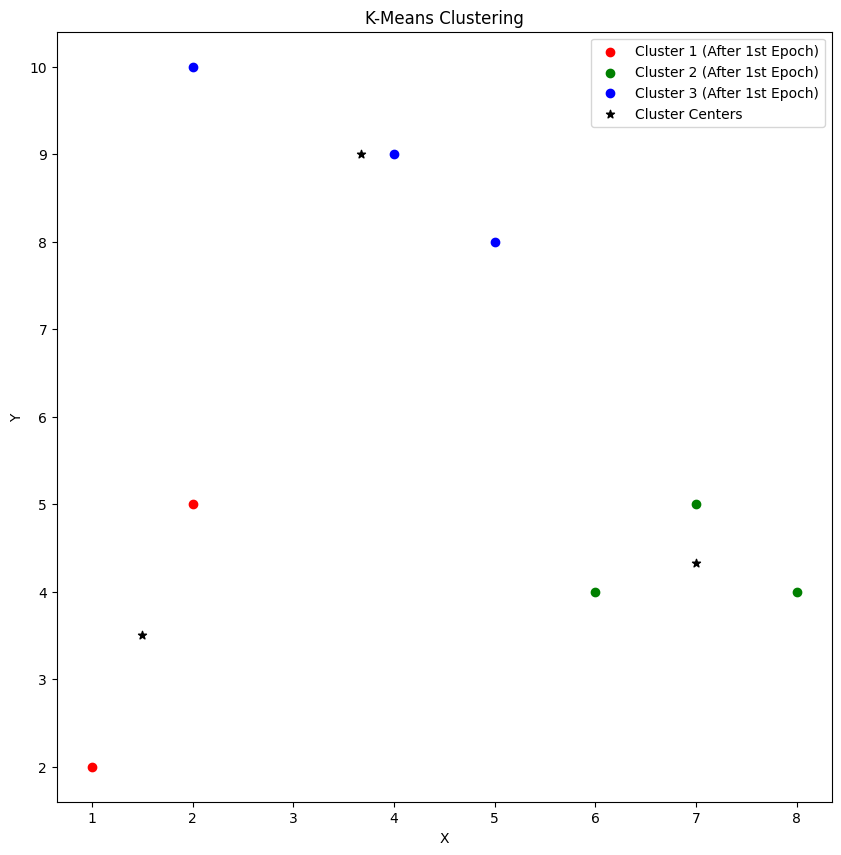

Cluster 1: [[2 5]
 [1 2]]
Cluster 2: [[8 4]
 [7 5]
 [6 4]]
Cluster 3: [[ 2 10]
 [ 5  8]
 [ 4  9]]
Centroids:
Cluster 1 centroid: [1.5 3.5]
Cluster 2 centroid: [7.         4.33333333]
Cluster 3 centroid: [3.66666667 9.        ]


In [34]:
# Assign each data point to the nearest cluster center
def assign_clusters(data, centers):
    num_points = data.shape[0]
    distances = np.zeros((num_points, len(centers)))
    for i in range(num_points):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(data[i] - center)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments


# Update the cluster centers
def update_centers(data, cluster_assignments, k):
    num_features = data.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)

    return centers


# K-Means algorithm for one epoch
def kmeans_one_epoch(data, initial_centers):
    centers = initial_centers.copy()
    # Assign data points to clusters
    cluster_assignments = assign_clusters(data, centers)
    # Update cluster centers
    centers = update_centers(data, cluster_assignments, len(initial_centers))
    return cluster_assignments, centers


# K-Means algorithm for multiple epochs until convergence
def kmeans_1(data, initial_centers):
    centers = initial_centers.copy()
    num_epochs = 0
    converged = False
    cluster_assignments_prev = None

    while not converged:
        # Assign data points to clusters
        cluster_assignments = assign_clusters(data, centers)

        # Check convergence
        if np.array_equal(cluster_assignments, cluster_assignments_prev):
            converged = True
        print(centers)
        # Update cluster centers
        centers = update_centers(data, cluster_assignments, len(initial_centers))
        # Print cluster assignments for each epoch
        # print(f"Epoch {num_epochs + 1}:")
        for i, point in enumerate(data):
            cluster = cluster_assignments[i] + 1
            # print(f"Point {i+1} - Cluster {cluster}")

        # Increment epoch counter
        num_epochs += 1
        cluster_assignments_prev = cluster_assignments.copy()

    return cluster_assignments, centers, num_epochs


cluster_assignments, centers = kmeans_one_epoch(dataset_1, initial_centers)

# Run K-Means algorithm for one epoch
plt.figure(figsize=(10, 10))

# Separate data points by cluster assignment
cluster_1 = dataset_1[cluster_assignments == 0]
cluster_2 = dataset_1[cluster_assignments == 1]
cluster_3 = dataset_1[cluster_assignments == 2]

# Plot each cluster with a different color and label
plt.scatter(
    cluster_1[:, 0], cluster_1[:, 1], color="red", label="Cluster 1 (After 1st Epoch)"
)
plt.scatter(
    cluster_2[:, 0], cluster_2[:, 1], color="green", label="Cluster 2 (After 1st Epoch)"
)
plt.scatter(
    cluster_3[:, 0], cluster_3[:, 1], color="blue", label="Cluster 3 (After 1st Epoch)"
)

# Plot cluster centers
plt.scatter(
    centers[:, 0], centers[:, 1], color="black", marker="*", label="Cluster Centers"
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# The new clusters (examples belonging to each cluster)
new_clusters = []
for i in range(len(initial_centers)):
    new_clusters.append(dataset_1[cluster_assignments == i])

for i, cluster in enumerate(new_clusters):
    print(f"Cluster {i+1}: {cluster}")


# The centers of the new clusters
print("Centroids:")
for i, center in enumerate(centers):
    print(f"Cluster {i+1} centroid: {center}")

[[2 5]
 [8 4]
 [4 9]]
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


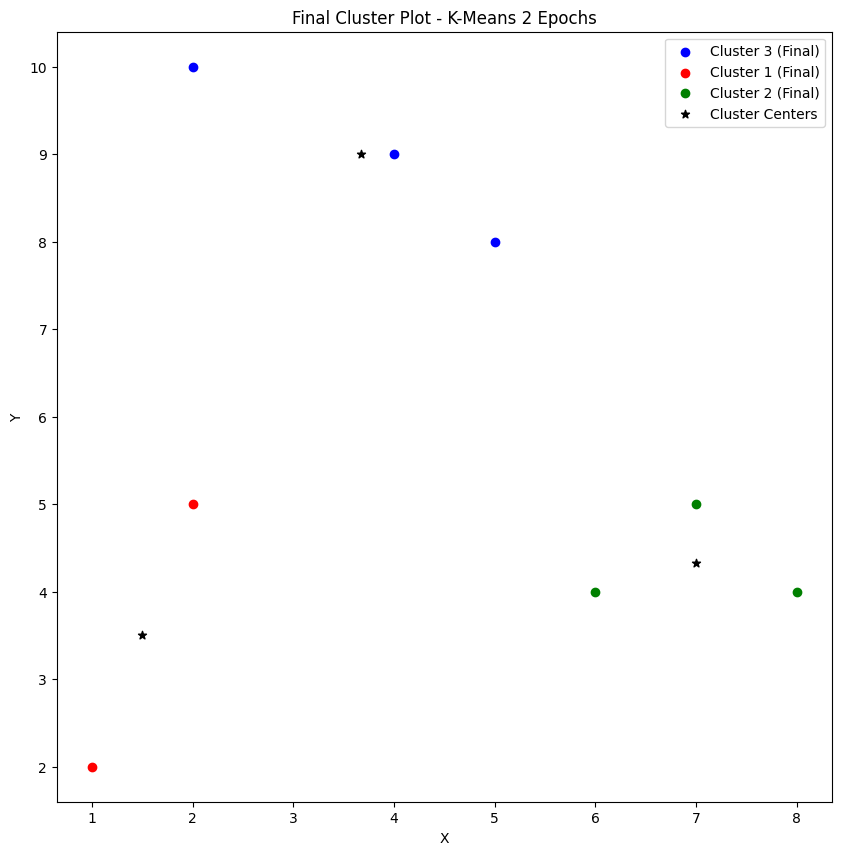

Number of iterations to converge: 2


In [35]:
# Epochs to convergence
# Run K-Means algorithm until convergence
cluster_assignments, centers, num_epochs = kmeans_1(dataset_1, initial_centers)

plt.figure(figsize=(10, 10))
clusters = defaultdict(list)
for i, point in enumerate(dataset_1):
    clusters[cluster_assignments[i]].append(point)
colors = ["red", "green", "blue"]

for cluster_id, points in clusters.items():
    points = np.array(points)
    plt.scatter(
        points[:, 0],
        points[:, 1],
        color=colors[cluster_id],
        label=f"Cluster {cluster_id+1} (Final)",
    )

plt.scatter(
    centers[:, 0], centers[:, 1], color="black", marker="*", label="Cluster Centers"
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Cluster Plot - K-Means 2 Epochs")
plt.legend()
plt.show()

print(f"Number of iterations to converge: {num_epochs}")


Training accuracy: 0.6333333333333333

Testing accuracy: 0.30864197530864196


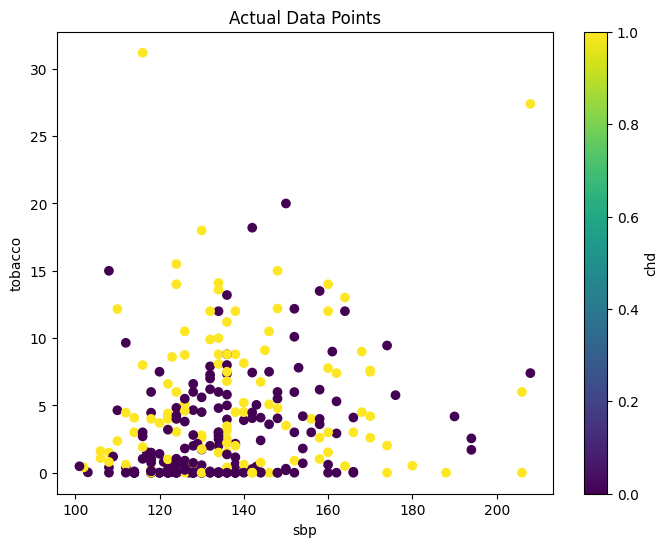

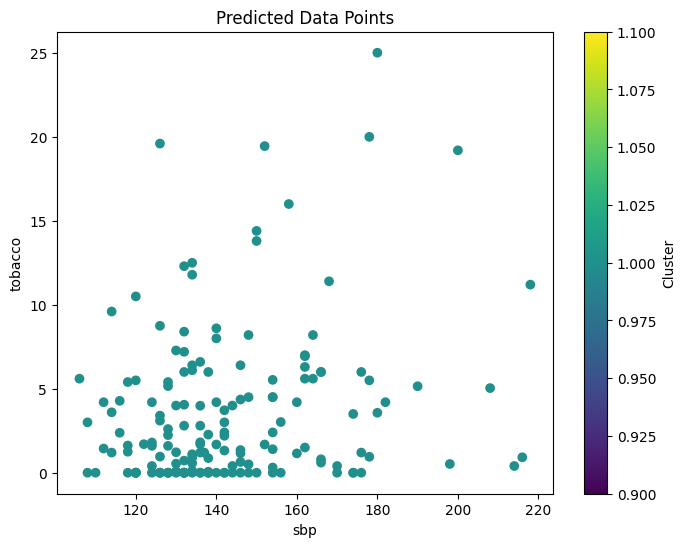

In [36]:
# Select features for clustering
features = ["sbp", "tobacco"]
data = df[features].values

# Separate training and testing data
train_data = data[:300]
test_data = data[300:]


# K-Means algorithm
def kmeans(data, k, num_epochs):
    num_samples, num_features = data.shape
    # Initialize cluster centers randomly
    np.random.seed(42)
    centers = np.random.randn(k, num_features)
    for epoch in range(num_epochs):
        # Step 1: Assign each data point to the nearest cluster center
        cluster_assignments = assign_clusters(data, centers)
        # Step 2: Update the cluster centers
        centers = update_centers(data, cluster_assignments, k)
    return cluster_assignments, centers


# Step 1: Assign each data point to the nearest cluster center
def assign_clusters(data, centers):
    num_samples = data.shape[0]
    distances = np.zeros((num_samples, len(centers)))
    for i in range(num_samples):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(data[i] - center)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments


# Step 2: Update the cluster centers
def update_centers(data, cluster_assignments, k):
    num_features = data.shape[1]
    centers = np.zeros((k, num_features))
    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        if len(cluster_points) > 0:
            centers[i] = np.mean(cluster_points, axis=0)
        else:
            # If no points assigned to cluster, keep center unchanged
            centers[i] = np.nan
    return centers


# Perform K-Means clustering
k = 2
num_epochs = 10
cluster_assignments, centers = kmeans(train_data, k, num_epochs)

# Assign cluster labels to training and testing data
train_labels = cluster_assignments
test_labels = assign_clusters(test_data, centers)

# Accuracy calculation
train_true_labels = df["chd"].values[:300]  # Ground truth labels for training data
test_true_labels = df["chd"].values[300:]  # Ground truth labels for testing data
conf_matrix_train = confusion_matrix(train_true_labels, train_labels)
# Compute confusion matrix for testing data
conf_matrix_test = confusion_matrix(test_true_labels, test_labels)
TP_train, FN_train, FP_train, TN_train = conf_matrix_train.ravel()
TP_test, FN_test, FP_test, TN_test = conf_matrix_test.ravel()
train_accuracy = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
test_accuracy = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
# train_true_labels = df['chd'].values[:300]  # Ground truth labels for training data
# test_true_labels = df['chd'].values[300:]  # Ground truth labels for testing data
# train_accuracy = np.mean(train_true_labels == train_labels)
# test_accuracy = np.mean(test_true_labels == test_labels)
print(f"\nTraining accuracy: {train_accuracy}")
print(f"\nTesting accuracy: {test_accuracy}")

# Plot 'sbp' vs 'tobacco' with actual data points
plt.figure(figsize=(8, 6))
plt.scatter(df["sbp"][:300], df["tobacco"][:300], c=df["chd"][:300])
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Actual Data Points")
plt.colorbar(label="chd")
plt.show()

# Plot 'sbp' vs 'tobacco' with predicted data points
plt.figure(figsize=(8, 6))
plt.scatter(df["sbp"][300:], df["tobacco"][300:], c=test_labels)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Predicted Data Points")
plt.colorbar(label="Cluster")
plt.show()

We calculate the accuracy by comparing the ground truth labels with the cluster assignments for both the training and testing data. The accuracy is calculated as the percentage of correct assignments. The plots show the 'sbp' vs 'tobacco' with actual and predicted data points, respectively, colored based on the 'chd' class and cluster assignments.

### Perform Nearest Neighbor Clustering Algorithm using Euclidean Distance

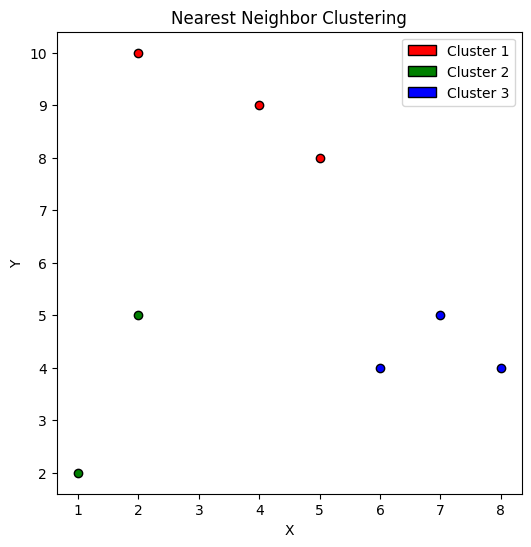

Nearest Neighbor clustering took 0.23343753814697266 seconds.
[[0.15601864 0.15599452]
 [0.05808361 0.86617615]]
[[0.51785626 0.29089708]
 [0.45315331 0.77606887]]
[[0.5181075  0.27605281]
 [0.45695465 0.76183198]]
[[0.52026027 0.2667806 ]
 [0.45710567 0.75264544]]
[[0.51649722 0.26224464]
 [0.46182827 0.74939982]]
[[0.51335862 0.25932135]
 [0.4654061  0.74743621]]
[[0.51128481 0.25707534]
 [0.46775733 0.74576354]]
[[0.5093682  0.25536331]
 [0.46981585 0.74452911]]
[[0.50920089 0.25484059]
 [0.47004944 0.74407142]]
[[0.50919645 0.25432987]
 [0.47012931 0.74360226]]
K-means clustering took 0.10262322425842285 seconds.
Nearest Neighbours accuracy: 56.17%


In [37]:
# Reinitiatlize the dataset for demo
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])


# Nearest Neighbor clustering algorithm
def nn_clustering(data, threshold):
    num_samples = data.shape[0]
    clusters = [-1] * num_samples  # Cluster assignments, -1 indicates unassigned
    cluster_count = 0  # Current cluster count

    for i in range(num_samples):
        if clusters[i] == -1:  # Unassigned data point
            clusters[i] = cluster_count  # Assign to a new cluster
            cluster_count += 1

        for j in range(num_samples):
            if i != j and clusters[j] == -1:  # Unassigned data point
                dist = np.linalg.norm(data[i] - data[j])  # Euclidean distance
                if dist <= threshold:
                    clusters[j] = clusters[i]  # Assign to the same cluster

    return clusters


# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(data, threshold)

# Are the same results the same that was gotten from K-Means?
# The results for the plot from the k-means algorithm shows the same result.

# Final plot for NN clustering

# Plotting the clusters
plt.figure(figsize=(6, 6))
colors = ["r", "g", "b", "c", "m", "y", "k"]
labels = [
    "Cluster 1",
    "Cluster 2",
    "Cluster 3",
    "Cluster 4",
    "Cluster 5",
    "Cluster 6",
    "Cluster 7",
    "Cluster 8",
]

legend_elements = []

for i, point in enumerate(data):
    cluster = clusters[i]
    plt.scatter(point[0], point[1], color=colors[cluster], edgecolor="black")
    # Add a legend entry for this cluster if it doesn't exist yet
    if labels[cluster] not in [e.get_label() for e in legend_elements]:
        legend_elements.append(
            Patch(facecolor=colors[cluster], edgecolor="black", label=labels[cluster])
        )

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Nearest Neighbor Clustering")
plt.legend(handles=legend_elements)
plt.show()


# Performance comparison of K-means and nearest neigbour clustering algorithms. Display the disadvantages of the algorithms.
# K-means clustering is an iterative algorithm that aims to minimize the within-cluster sum of squares, seeking a local optimum. It converges to a solution but can be sensitive to the initial cluster centroids and may get stuck in suboptimal solutions.
# Nearest Neighbor (NN) clustering assigns each data point to a cluster based on its nearest neighbor within a threshold distance. It is a simple algorithm but can be affected by noise and outliers.
# Disadvantages on Bigger Datasets:
# K-means clustering:
# Scalability: As the dataset size increases, the computational cost of K-means also increases significantly. It requires calculating distances between each data point and each cluster center, resulting in a quadratic time complexity.
# Memory Usage: K-means requires storing the entire dataset and cluster centers in memory, which can be a limitation for large datasets that cannot fit into memory. Sensitivity to Initialization: K-means can be sensitive to the initial selection of cluster centroids, leading to different results for different initializations. It requires careful initialization techniques to obtain optimal results.
# Nearest Neighbor (NN) clustering:
# Computational Complexity: Nearest Neighbor clustering involves comparing each data point to all other data points, resulting in a time complexity of O(N^2), where N is the number of data points. As the dataset size increases, the computational cost becomes prohibitive. Threshold Selection: The performance of NN clustering is highly dependent on the threshold distance. Choosing an appropriate threshold value can be challenging, especially for datasets with varying densities or irregular clusters.
# Noise Sensitivity: NN clustering is sensitive to noise and outliers, as it assigns data points solely based on proximity. Outliers or noisy points may result in incorrect cluster assignments or the formation of undesired clusters.

# The provided code contains two clustering algorithms: Nearest Neighbor and K-means.
# The Nearest Neighbor algorithm works by assigning each data point to a cluster based on a threshold distance. If a data point is within the threshold distance from another data point, they are assigned to the same cluster.
# The K-means algorithm, on the other hand, works by initializing a set of cluster centers and assigning each data point to the nearest center. The centers are then updated based on the mean of the data points in each cluster. This process is repeated until the cluster assignments do not change between iterations.

# Performance Comparison:
# - K-means is generally faster than Nearest Neighbor as it requires fewer comparisons. K-means complexity is O(n), where n is the number of data points, while Nearest Neighbor has a complexity of O(n^2).
# - K-means tends to produce more compact clusters than Nearest Neighbor, which can result in better performance on many datasets.

# Disadvantages on bigger datasets:
# - K-means can be sensitive to the initial choice of cluster centers. Poor initial centers can lead to poor clustering results. Also, K-means may converge to a local minimum rather than the global minimum.
# - Nearest Neighbor can be very slow on large datasets due to its O(n^2) complexity. Also, the choice of the threshold distance can greatly affect the clustering results.
# Please note that the `assign_clusters` and `update_centers` functions used in the K-means algorithm are not defined in the provided code. You would need to implement these functions for the K-means algorithm to work.

# Disadvantages of K-Means from lectures and research:
# 1. Sensitive to initial cluster centers.
# 2. May converge to local optima depending on initialization.
# 3. Assumes clusters are convex and isotropic.

# Disadvantages of Nearest Neighbor from lectures and research:
# 1. Computationally expensive for large datasets.
# 2. No explicit optimization objective.
# 3. Lack of interpretability.

# Generate synthetic data
data = np.random.rand(1000, 2)

## Sample performance time test
# Nearest Neighbor clustering
start_time = time.time()
threshold = 0.1
clusters_nn = nn_clustering(data, threshold)
end_time = time.time()
print(f"Nearest Neighbor clustering took {end_time - start_time} seconds.")

# K-means clustering
start_time = time.time()
initial_centers = data[:2, :]  # Use the first two data points as initial centers
clusters_kmeans, centers, num_epochs = kmeans_1(data, initial_centers)
end_time = time.time()
print(f"K-means clustering took {end_time - start_time} seconds.")

# Accuracy
# Extract 'sbp', 'tobacco', and 'chd' columns
df = df[["sbp", "tobacco", "chd"]]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]


# Nearest Neighbor clustering algorithm
def nn_clustering(train_data, test_data, threshold):
    clusters = []
    for i in range(len(test_data)):
        min_dist = np.inf
        min_cluster = None
        for j in range(len(train_data)):
            dist = np.sqrt(
                (test_data.iloc[i]["sbp"] - train_data.iloc[j]["sbp"]) ** 2
                + (test_data.iloc[i]["tobacco"] - train_data.iloc[j]["tobacco"]) ** 2
            )
            if dist < min_dist:
                min_dist = dist
                min_cluster = train_data.iloc[j]["chd"]
        clusters.append(min_cluster)
    return clusters


# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(train_data, test_data, threshold)

# Calculate accuracy
# Generate confusion matrix
y_true = test_data["chd"]
y_pred = clusters
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()
train_accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

# Print accuracy using confusion matrix and accuracy formula
print(f"Nearest Neighbours accuracy: {train_accuracy:.2f}%")
# accuracy = sum(clusters == test_data['chd']) / len(test_data) * 100
# # Print accuracy
# print(f"Nearest Neighbours accuracy: {accuracy:.2f}%")

### Perform DBScan Algorithm using Euclidean Distance

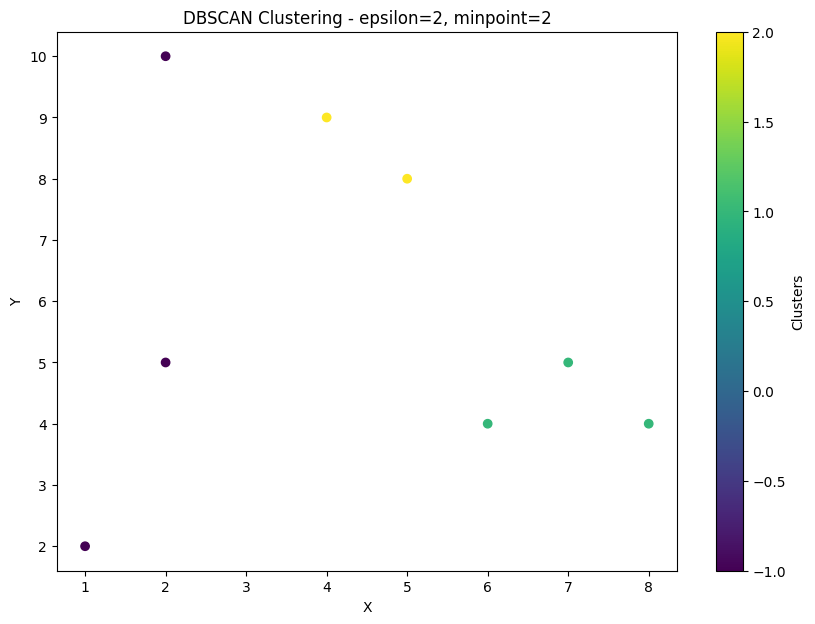

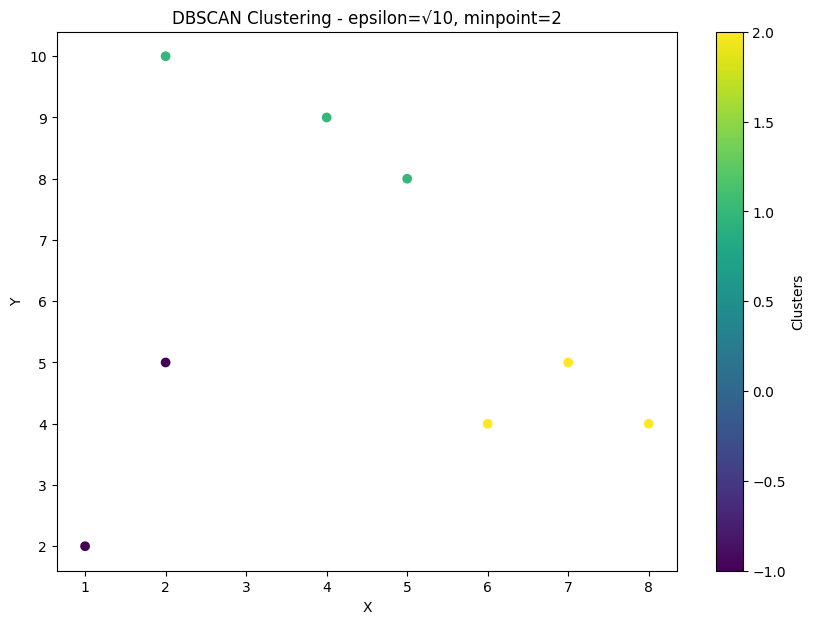


Training accuracy: 0.36666666666666664

Testing accuracy: 0.30864197530864196


In [38]:
# Define function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# Define function to find neighbors
def get_neighbors(dataset, point, epsilon):
    neighbors = []
    for i in range(len(dataset)):
        if euclidean_distance(dataset[point], dataset[i]) < epsilon:
            neighbors.append(i)
    return neighbors


# Implement DBScan algorithm
def dbscan(dataset, epsilon, min_points):
    labels = [0] * len(dataset)
    curr_label = 0

    for point in range(len(dataset)):
        if labels[point] != 0:  # skip if point is already part of a cluster
            continue
        neighbors = get_neighbors(dataset, point, epsilon)
        if len(neighbors) < min_points:  # mark as noise if not enough neighbors
            labels[point] = -1
        else:  # else, create new cluster and add all reachable points
            curr_label += 1
            labels[point] = curr_label
            i = 0
            while i < len(neighbors):
                neighbour = neighbors[i]
                if labels[neighbour] == -1:
                    labels[neighbour] = curr_label
                elif labels[neighbour] == 0:
                    labels[neighbour] = curr_label
                    new_neighbors = get_neighbors(dataset, neighbour, epsilon)
                    if len(new_neighbors) >= min_points:
                        neighbors = neighbors + new_neighbors
                i += 1
    return labels


# Provide the final cluster plot
labels = dbscan(dataset_1, 2, 2)
plt.figure(figsize=(10, 7))  # Create a new figure with a specific size (optional)
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=labels)
plt.title("DBSCAN Clustering - epsilon=2, minpoint=2")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Clusters")
plt.show()

# Perform the DBScan for Epsilon root 10 and provide the cluster plot
new_epsilon = math.sqrt(10)
labels = dbscan(dataset_1, new_epsilon, 2)
plt.figure(figsize=(10, 7))  # Create a new figure with a specific size (optional)
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=labels)
plt.title("DBSCAN Clustering - epsilon=√10, minpoint=2")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Clusters")
plt.show()

# Provide accuracy and compare K-means, NN, and DBScan clustering performance for Dataset 2
dataset_2 = pd.read_csv(
    "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
)
X = dataset_2[["sbp", "tobacco"]].to_numpy()
y = dataset_2["chd"].values
X_train, X_test = X[:300], X[300:]
y_train, y_test = y[:300], y[300:]

# Apply DBSCAN algorithm
train_labels = dbscan(X_train, 50, 50)
test_labels = dbscan(X_test, 50, 50)

train_cm = confusion_matrix(y_train, train_labels)
test_cm = confusion_matrix(y_test, test_labels)

# Calculate accuracy
train_accuracy = (train_cm[0][0] + train_cm[1][1]) / np.sum(train_cm)
test_accuracy = (test_cm[0][0] + test_cm[1][1]) / np.sum(test_cm)

print(f"\nTraining accuracy: {train_accuracy}")
print(f"\nTesting accuracy: {test_accuracy}")

### Use SKLearn to verify results for K-Means, Nearest Neighbor, and DBScan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


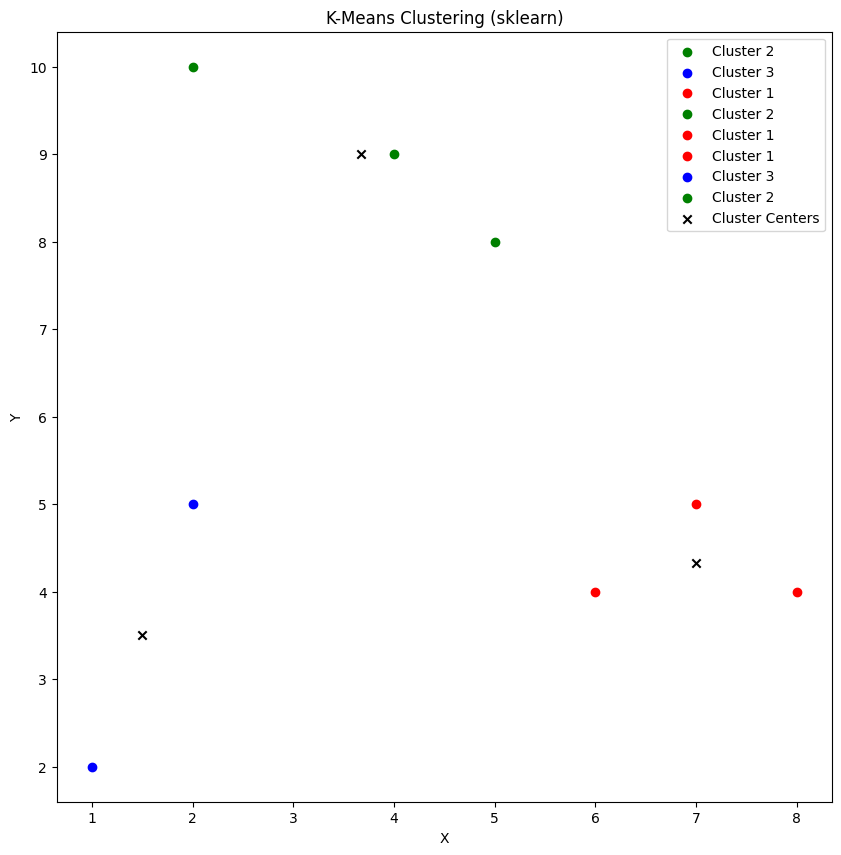

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


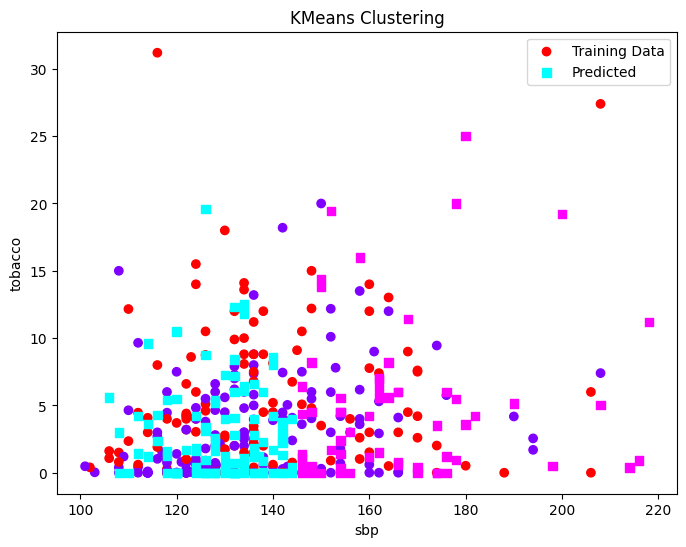

Silhouette Score: 0.56


In [39]:
# Observations and comparisons
# K-Means clustering with 3 clusters
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Create KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 10))

# Plotting clusters
for i, point in enumerate(data):
    if cluster_labels[i] == 0:
        plt.scatter(point[0], point[1], color="red", label="Cluster 1")
    elif cluster_labels[i] == 1:
        plt.scatter(point[0], point[1], color="green", label="Cluster 2")
    else:
        plt.scatter(point[0], point[1], color="blue", label="Cluster 3")

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    color="black",
    marker="x",
    label="Cluster Centers",
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering (sklearn)")
plt.legend()
plt.show()

### Dataset 2

# Load the data
data = pd.read_csv(
    "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
)

# Extract 'sbp', 'tobacco', and 'chd' columns
df = data[["sbp", "tobacco", "chd"]]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Perform KMeans clustering using scikit-learn
X_train = train_data[["sbp", "tobacco"]]
y_train = train_data["chd"]
X_test = test_data[["sbp", "tobacco"]]
y_test = test_data["chd"]

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)

# Predict the clusters for the test data
predictions = kmeans.predict(X_test)

# Plotting the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(
    train_data["sbp"],
    train_data["tobacco"],
    c=train_data["chd"],
    cmap="rainbow",
    label="Training Data",
)
plt.scatter(
    X_test["sbp"],
    X_test["tobacco"],
    c=predictions,
    cmap="cool",
    marker="s",
    label="Predicted",
)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("KMeans Clustering")
plt.legend()
plt.show()

# Calculate silhouette score
silhouette = silhouette_score(X_test, predictions)

# Print silhouette score
print(f"Silhouette Score: {silhouette:.2f}")
predicted_labels = [0 if cluster == 1 else 1 for cluster in predictions]
accuracy = accuracy_score(y_test, predicted_labels)

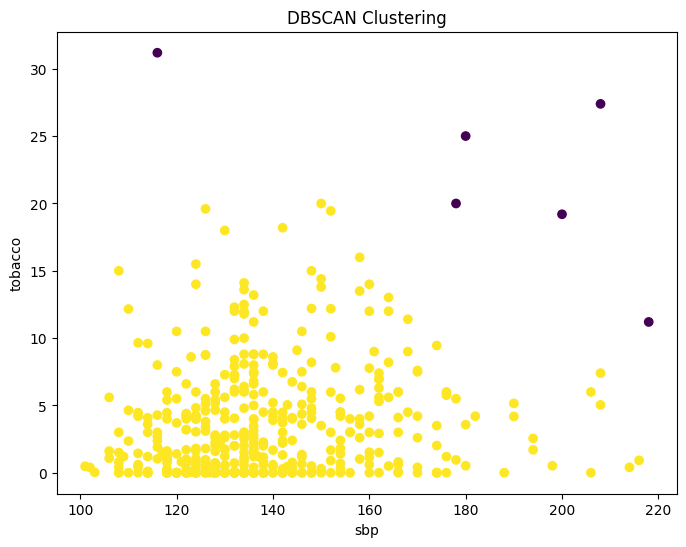

Silhouette Score: 0.58


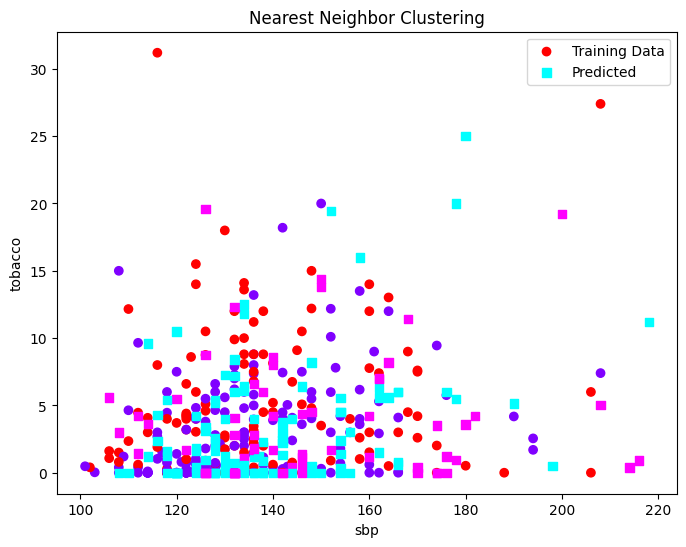

Accuracy: 56.17%


In [40]:
## DBScan clustering
data = pd.read_csv(
    "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
)

# Extract features
X = data[["sbp", "tobacco"]]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X)

silhouette_avg = silhouette_score(X, clusters)

plt.figure(figsize=(8, 6))
plt.scatter(X["sbp"], X["tobacco"], c=clusters)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("DBSCAN Clustering")
plt.show()

print(f"Silhouette Score: {silhouette_avg:.2f}")


## Nearest Neighbours
data = pd.read_csv(
    "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
)

# Extract 'sbp', 'tobacco', and 'chd' columns
df = data[["sbp", "tobacco", "chd"]]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Perform Nearest Neighbor clustering using scikit-learn
X_train = train_data[["sbp", "tobacco"]]
y_train = train_data["chd"]
X_test = test_data[["sbp", "tobacco"]]
y_test = test_data["chd"]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculate accuracy using scikit-learn
accuracy = accuracy_score(y_test, predictions) * 100

# Plotting the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(
    train_data["sbp"],
    train_data["tobacco"],
    c=train_data["chd"],
    cmap="rainbow",
    label="Training Data",
)
plt.scatter(
    X_test["sbp"],
    X_test["tobacco"],
    c=predictions,
    cmap="cool",
    marker="s",
    label="Predicted",
)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Nearest Neighbor Clustering")
plt.legend()
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")

Overall, from the implemented graphs and the analysis of performance of the DBScan, KNN, and KMeans we can see that for larger data. KMeans seems to be the most appropriate for larger data because of how less expensive it is.The silhouette score was leveraged to test the accuracie and the implementation from scratch works properly. More tuning maybe required for DBScan as for unsupervised learning more tuning is required unlike supervised learning algorithms like k-nearest neighbours.

### Different metrics used to evaluate the performance of different clustering algorithms?

Different metrics used to evaluate the performance of clustering algorithms include silhouette score, Davies-Bouldin index, and adjusted Rand index. The silhouette score measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1, where a higher score indicates better clustering. The Davies-Bouldin index evaluates the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering. The adjusted Rand index measures the similarity between two clusterings, considering all pairs of samples and accounting for chance. These metrics offer comprehensive insights into the quality of clustering results beyond simple accuracy assessment. The performance of different clustering algorithms can also be distinguished through f1 score, recall, precision, and accuracy. For most unsupervised algorithms, the silhouette score can be leveraged, as an example this was implementd in the cell above.


### Instead of accuracy, what other ways can we evaluate the performance of the three algorithms?

In addition to accuracy, clustering algorithms in this experiment can be evaluated using metrics such as completeness, homogeneity, and V-measure. Completeness measures whether all members of a given class are assigned to the same cluster, homogeneity evaluates if each cluster contains only members of a single class, and V-measure is the harmonic mean of completeness and homogeneity. These metrics are particularly useful when dealing with datasets with known ground truth labels and provide a more nuanced understanding of the clustering performance in terms of both cluster purity and class assignment consistency. Time was also another performance metric that was leveraged to test how well a model performed such as the performance of K-Means and K-NN.